In [1]:
from sklearn import tree
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\My Desktop\machine learning\Crop Recommendation System\Crop_recommendation.csv")

In [4]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [5]:
df1 = df.drop(df[['Unnamed: 8','Unnamed: 9']],axis=1)

In [6]:
df1

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
df1.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df1.isnull().any()

Nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [9]:
df1.size

17600

In [10]:
x = df1.drop(['label'],axis=1)
y = df1['label']
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [19]:
model = tree.DecisionTreeClassifier()

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
model.score(x_test,y_test)

0.9854545454545455

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [23]:
model.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

array(['rice'], dtype=object)

Text(50.722222222222214, 0.5, 'Tested Values')

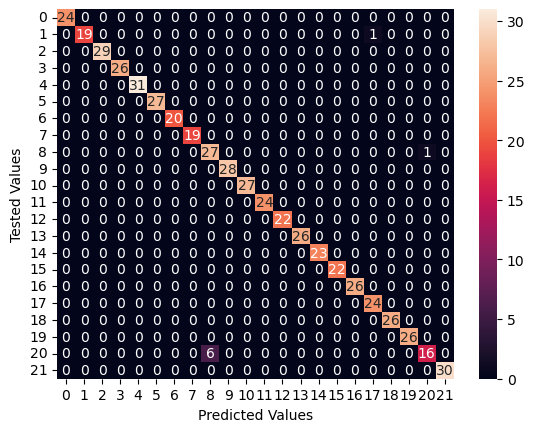

In [25]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Tested Values")